In [1]:
import pandas as pd
import math
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 1000)
%matplotlib inline

In [2]:
train = pd.read_csv('..//data//train_data.csv')
test = pd.read_csv('..//data//test_data.csv')

In [3]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [4]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

There aren't any missing values. Let's jump to building models to get some baseline score.

In [5]:
## check missing values
train.isnull().sum(axis=0) ## there are no missing values.

connection_id    0
cont_1           0
cont_2           0
cont_3           0
cont_4           0
cont_5           0
cont_6           0
cont_7           0
cont_8           0
cont_9           0
cont_10          0
cont_11          0
cont_12          0
cont_13          0
cont_14          0
cont_15          0
cont_16          0
cont_17          0
cont_18          0
cat_1            0
cat_2            0
cat_3            0
cat_4            0
cat_5            0
cat_6            0
cat_7            0
cat_8            0
cat_9            0
cat_10           0
cat_11           0
cat_12           0
cat_13           0
cat_14           0
cat_15           0
cat_16           0
cat_17           0
cat_18           0
cat_19           0
cat_20           0
cat_21           0
cat_22           0
cat_23           0
target           0
dtype: int64

### Feature Engineering

#### 1) For Continuous values

In [6]:
# # for cont_1 bin and do one hot encoding
train['cont_1_bin'] = 0 # 'less_50'
train['cont_1_bin'][train.cont_1 > 1000] = 1 # 'grt_1000'
train['cont_1_bin'][((train.cont_1 > 500) & (train.cont_1 <= 1000))] = 2 # '500_1000'
train['cont_1_bin'][((train.cont_1 > 100) & (train.cont_1 <= 500))] = 3 # '100_500'
train['cont_1_bin'][((train.cont_1 > 50) & (train.cont_1 <= 100))] = 4 # '50_100'
test['cont_1_bin'] = 0 # 'less_50'
test['cont_1_bin'][test.cont_1 > 1000] = 1 # 'grt_1000'
test['cont_1_bin'][((test.cont_1 > 500) & (test.cont_1 <= 1000))] = 2 # '500_1000'
test['cont_1_bin'][((test.cont_1 > 100) & (test.cont_1 <= 500))] = 3 # '100_500'
test['cont_1_bin'][((test.cont_1 > 50) & (test.cont_1 <= 100))] = 4 # '50_100'

# # add log for cont_1, cont_2, cont_3
cols = ['cont_1', 'cont_2', 'cont_3']
for eachCol in cols:
    train['log_' + eachCol] = np.log(train[eachCol])
    test['log_' + eachCol] = np.log(test[eachCol])
train = train.replace([np.inf, -np.inf], -1)
test = test.replace([np.inf, -np.inf], -1)

# # cont_4 to cont_18 are all lying between 0 - 1

In [7]:
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,target,cont_1_bin,log_cont_1,log_cont_2,log_cont_3
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.253829,-1.0
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0


#### 2) For Categorical values

In [8]:
# # cat_1, cat_2, cat_3, cat_7 => leave for now
# check importance and if possible treat them

# # leave cat_4, cat_8, cat_9, cat_11 as binary

# # cat_5 has 0, 1, 3 => make it 0, 1, 2
# later we can do one hot encoding!!
train.cat_5[train.cat_5 == 3] = 2
test.cat_5[test.cat_5 == 3] = 2

# # cat_6 - we can drop it as the test data has constant value
del train['cat_6']
del test['cat_6']

# # cat_10 - convert all values >= 2 as 2
# later we can do one hot encoding !!
train.cat_10[train.cat_10 >= 2] = 2
test.cat_10[test.cat_10 >= 2] = 2

# # cat_12, cat_13, cat_14, cat_16 - make it binary i.e. >=1 as 1 else 0
cols = ['cat_12', 'cat_13', 'cat_14', 'cat_16']
for eachCol in cols:
    train[eachCol][train[eachCol] >= 1] = 1
    test[eachCol][test[eachCol] >= 1] = 1

# # cat_15 - drop a row which has value = 2 (as it is not present in test data)
train = train[train.cat_15 != 2]

# # drop cat_17, cat_18 => constant columns
del train['cat_17']
del train['cat_18']

# # create two features using cat_20, cat_21 and cat_22 and cat_23
# equality flag
train['flag_20_21'] = train['cat_20'] == train['cat_21']
test['flag_20_21'] = test['cat_20'] == test['cat_21']
train['flag_22_23'] = train['cat_22'] == train['cat_23']
test['flag_22_23'] = test['cat_22'] == test['cat_23']
train.flag_20_21 = train.flag_20_21.astype(int)
train.flag_22_23 = train.flag_22_23.astype(int)
test.flag_20_21 = test.flag_20_21.astype(int)
test.flag_22_23 = test.flag_22_23.astype(int)

# # create log features for cat_22, cat_23
cols = ['cat_22', 'cat_23']
for eachCol in cols:
    train['log_' + eachCol] = np.log(train[eachCol])
    test['log_' + eachCol] = np.log(test[eachCol])
train = train.replace([np.inf, -np.inf], -1)
test = test.replace([np.inf, -np.inf], -1)

In [9]:
train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_19,cat_20,cat_21,cat_22,cat_23,target,cont_1_bin,log_cont_1,log_cont_2,log_cont_3,flag_20_21,flag_22_23,log_cat_22,log_cat_23
0,cxcon_1,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264
1,cxcon_4,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.253829,-1.0,1,1,5.541264,5.541264
2,cxcon_7,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264
3,cxcon_10,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264
4,cxcon_13,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.0,1,1,5.541264,5.541264


In [10]:
test.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cont_1_bin,log_cont_1,log_cont_2,log_cont_3,flag_20_21,flag_22_23,log_cat_22,log_cat_23
0,cxcon_2,0,331,6085,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,13,13,255,255,0,-1.0,5.802118,8.713582,1,1,5.541264,5.541264
1,cxcon_5,0,520,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,-1.0,6.253829,-1.000000,1,1,5.541264,5.541264
2,cxcon_8,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
3,cxcon_11,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,510,509,255,255,0,-1.0,6.939254,-1.000000,0,1,5.541264,5.541264
4,cxcon_14,0,1032,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264


#### 3) One hot Encoding

In [11]:
# # TO DO !!
# # do one hot encoding for cont_1_bin, cat_10, cat_5
cols = ['cat_10', 'cat_5', 'cont_1_bin']

### Model 1 - XGBOOST

In [134]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [135]:
feature_names = [x for x in train.columns if x not in ['connection_id','target']]
target = train['target']

In [136]:
X_train, X_valid, y_train, y_valid = train_test_split(train, target, train_size = 0.7, stratify = target, random_state = 294056)

In [137]:
X_train.head()

,connection_id,cont_1,cont_2,cont_3,cont_4,cont_5,cont_6,cont_7,cont_8,cont_9,cont_10,cont_11,cont_12,cont_13,cont_14,cont_15,cont_16,cont_17,cont_18,cat_1,cat_2,cat_3,cat_4,cat_5,cat_7,cat_8,cat_9,cat_10,cat_11,cat_12,cat_13,cat_14,cat_15,cat_16,cat_19,cat_20,cat_21,cat_22,cat_23,target,cont_1_bin,log_cont_1,log_cont_2,log_cont_3,flag_20_21,flag_22_23,log_cat_22,log_cat_23
21597,cxcon_64792,0,267,281,0.0,0.0,0.0,0.0,1.00,0.00,0.0,0.97,0.01,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,16,16,255,248,1,0,-1.0,5.587249,5.638355,1,0,5.541264,5.513429
164110,cxcon_492331,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,0,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
162618,cxcon_487855,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,510,510,255,255,0,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
89832,cxcon_269497,0,1032,0,0.0,0.0,0.0,0.0,1.00,0.00,0.0,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,3,10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,511,511,255,255,2,0,-1.0,6.939254,-1.000000,1,1,5.541264,5.541264
168035,cxcon_504106,0,0,0,1.0,1.0,0.0,0.0,0.06,0.05,0.0,0.01,0.07,0.0,0.0,1.0,1.0,0.0,0.0,1,13,8,0,0,0,0,0,0,0,0,0,0,0,0,0,146,9,255,2,0,0,-1.0,-1.000000,-1.000000,0,0,5.541264,0.693147


In [138]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [139]:
# default parameters
params = {'objective':'multi:softmax',
          'num_class':3,
          'learning_rate': 0.05,
          'reg_alpha' : 2.0,
          'random_state': 294056,
          # 'eval_metric':'merror'
         }

In [140]:
dtrain = xgb.DMatrix(data=X_train[feature_names], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[feature_names], label=y_valid)
dtest = xgb.DMatrix(data=test[feature_names])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [141]:
clf1 = xgb.train(params, dtrain, 1000, watchlist, maximize=True, verbose_eval=20, early_stopping_rounds=40, feval=multAcc)
# 153 - 0.781127

[0]	train-merror:0.221164	eval-merror:0.221058	train-maccuracy:0.778836	eval-maccuracy:0.778942
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 40 rounds.
[20]	train-merror:0.22016	eval-merror:0.220133	train-maccuracy:0.77984	eval-maccuracy:0.779867
[40]	train-merror:0.219426	eval-merror:0.219326	train-maccuracy:0.780574	eval-maccuracy:0.780674
[60]	train-merror:0.219122	eval-merror:0.219129	train-maccuracy:0.780878	eval-maccuracy:0.780871
[80]	train-merror:0.218886	eval-merror:0.219031	train-maccuracy:0.781114	eval-maccuracy:0.780969
[100]	train-merror:0.218818	eval-merror:0.219011	train-maccuracy:0.781182	eval-maccuracy:0.780989
[120]	train-merror:0.218734	eval-merror:0.218991	train-maccuracy:0.781266	eval-maccuracy:0.781009
[140]	train-merror:0.218717	eval-merror:0.218893	train-maccuracy:0.781283	eval-maccuracy:0.781107
[160]	train-merror:0.21859	eval-merror:0.218873	train-maccuracy:0.78141

#### Save the model

In [21]:
clf1.save_model('..//model_objects//xgb_with_features_1.model')

### Plot and check the importances

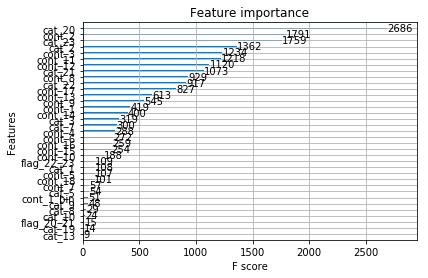

In [61]:
xgb.plot_importance(clf1)

In [99]:
from numpy import array
imp_vals = clf1.get_fscore()
total = sum(list(imp_vals.values()))
imp_vals_fs = [i/total for i in imp_vals.values()]
imp_vals = pd.DataFrame({'cols' : list(imp_vals.keys()), 'fscore' : imp_vals_fs})
imp_vals
# del imp_vals_fs
imp_vals.sort_values(['fscore'], ascending=[0])# .to_csv('..//data//xgb_importance.csv', index = False)

,cols,fscore
0,cat_20,0.137751
3,cont_2,0.091851
15,cat_23,0.090210
4,cat_2,0.069850
7,cont_3,0.063285
19,cont_11,0.062465
5,cont_12,0.057439
20,cat_21,0.055028
18,cont_8,0.047643
10,cat_22,0.047028


In [98]:
pred = clf1.predict(dtest)

In [99]:
## make submission
acc = '0.781033'
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub.to_csv('..//submissions//xgb_sub4 (' + acc + ').csv', index=False)

### Model 2 - Decision Tree

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [64]:
## set up model
clf2 = DecisionTreeClassifier(max_depth=8, min_samples_split=7, max_features='sqrt')

In [65]:
## train model
clf2.fit(X_train[feature_names], y_train)
# clf2.fit(train[feature_names], target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=7,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [66]:
## make prediction
pred2 = clf2.predict(X_valid[feature_names])

In [67]:
## check accuracy
acc = accuracy_score(y_valid, pred2)
acc # 0.77945345723736026

0.77945345723736026

In [34]:
## predict on test set
pred2 = clf2.predict(test[feature_names])

In [35]:
## make submission
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred2
sub['target'] = sub['target'].astype(int)
sub.to_csv('..//submissions//dt_sub1 (' + str(acc) + ').csv', index=False)

### Model 3 - EXTRA TREES

In [85]:
from sklearn.ensemble import ExtraTreesClassifier

In [86]:
clf3 = ExtraTreesClassifier(n_estimators = 1000, random_state = 294056, n_jobs = -1, max_depth = 6)

In [87]:
clf3.fit(X_train[feature_names], y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=6, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=294056, verbose=0,
           warm_start=False)

In [88]:
pred3 = clf3.predict(X_valid[feature_names])
## calculate accuracy
acc = accuracy_score(y_valid, pred3)
acc # 0.77809497558670659

0.77809497558670659

In [44]:
## make predictions
pred3 = clf3.predict(test[feature_names])

In [45]:
## make submission
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('..//submissions//extra_tress_sub1 (' + str(acc) + ').csv', index=False)

### Model 4 - Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier(n_estimators = 1000, random_state = 294056, n_jobs = -1, max_depth = 6)
clf4.fit(X_train[feature_names], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=294056, verbose=0,
            warm_start=False)

In [74]:
# # calculate accuracy
pred4 = clf4.predict(X_valid[feature_names])
acc = accuracy_score(y_valid, pred4)
acc # 0.77984722003465112

0.77984722003465112

In [109]:
# # get importance
rf_imp = pd.DataFrame({'f' : feature_names, 'v' : clf4.feature_importances_})
rf_imp.sort_values('v', ascending = 0).to_csv('..//data//rf_imp.csv', index = False)

In [ ]:
## make predictions
pred4 = clf4.predict(test[feature_names])

In [ ]:
## make submission
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred4
sub['target'] = sub['target'].astype(int)
# sub.to_csv('..//submissions//rf_sub1.csv', index=False)
sub.to_csv('..//submissions//rf_sub1 (' + str(acc) + ').csv', index=False)

### Model 5 - ADABOOST

In [91]:
from sklearn.ensemble import AdaBoostClassifier
clf5 = AdaBoostClassifier(n_estimators = 1000, random_state = 294056)
clf5.fit(X_train[feature_names], y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=294056)

In [92]:
## calculate accuracy
pred5 = clf5.predict(X_valid[feature_names])
acc = accuracy_score(y_valid, pred5)
acc # 0.77984722003465112

0.69156560088202867

In [93]:
# # get importance
ada_imp = pd.DataFrame({'f' : feature_names, 'v' : clf5.feature_importances_})
ada_imp.sort_values('v', ascending = 0)

,f,v
40,log_cont_2,0.132
1,cont_2,0.116
19,cat_2,0.084
12,cont_13,0.054
10,cont_11,0.051
34,cat_20,0.045
11,cont_12,0.044
41,log_cont_3,0.040
2,cont_3,0.036
16,cont_17,0.033


### Model 6 - Voting Classifier

In [96]:
from sklearn.ensemble import VotingClassifier
eclf1 = VotingClassifier(estimators=[('et', clf3), ('rf', clf4), ('dt', clf2)], voting='hard')
eclf1.fit(X_train[feature_names], y_train)

VotingClassifier(estimators=[('et', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=6, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fra...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [97]:
## calculate accuracy
pred5 = eclf1.predict(X_valid[feature_names])
acc = accuracy_score(y_valid, pred5)
acc # 0.77988659631438018

0.7798275318947866

In [62]:
## make predictions
pred5 = eclf1.predict(test[feature_names])

In [63]:
## make submission
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred5
sub['target'] = sub['target'].astype(int)
# sub.to_csv('..//submissions//voting_clf_sub1.csv', index=False)
sub.to_csv('..//submissions//voting_clf_sub1 (' + str(acc) + ').csv', index=False)

### Model 7 - CATBOOST

In [19]:
from catboost import CatBoostClassifier

In [20]:
cat_train = np.array(X_train[feature_names])
cat_valid = np.array(X_valid[feature_names])
cat_train_labels = np.array(y_train)
cat_valid_labels = np.array(y_valid)
cat_test = np.array(test[feature_names])

In [64]:
# get categorical columns
cat_cols = [i for i, eachCol in enumerate(feature_names) if (eachCol.split('_')[0] == 'cat') or (eachCol == 'cont_1_bin')]

In [36]:
clf7 = CatBoostClassifier(iterations = 500, learning_rate = 0.05, depth = 2, loss_function = 'MultiClass')
clf7.fit(cat_train, cat_train_labels, cat_cols)

In [37]:
## calculate accuracy
pred7 = clf7.predict(cat_valid)
acc = accuracy_score(cat_valid_labels, pred7)
acc # 0.7796897149157348

0.7796897149157348

### Model 8 - LightGBM

In [39]:
import lightgbm as lgb

In [127]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train[feature_names], y_train)
lgb_valid = lgb.Dataset(X_valid[feature_names], y_valid, reference = lgb_train)

In [128]:
# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': 'multi_error',
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.7,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'num_class' : 3
}

In [129]:
clf8 = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=[lgb_train, lgb_valid],
                early_stopping_rounds = 40,
                verbose_eval=20)

Training until validation scores don't improve for 40 rounds.
[20]	training's multi_error: 0.219206	valid_1's multi_error: 0.218971
[40]	training's multi_error: 0.218987	valid_1's multi_error: 0.218991
[60]	training's multi_error: 0.218877	valid_1's multi_error: 0.218893
[80]	training's multi_error: 0.218683	valid_1's multi_error: 0.218893
[100]	training's multi_error: 0.218438	valid_1's multi_error: 0.218971
Early stopping, best iteration is:
[62]	training's multi_error: 0.218877	valid_1's multi_error: 0.218853


In [154]:
## calculate accuracy
pred8 = clf8.predict(X_valid[feature_names])
pred8 = np.argmax(pred8, axis=1)
acc = accuracy_score(y_valid, pred8)
acc # 0.7811466372657111

0.7811466372657111

In [131]:
# # predict on the test set
pred8 = clf8.predict(test[feature_names])
pred8 = np.argmax(pred8, axis=1)

In [132]:
## make submission
sub = pd.read_csv('..//submissions//sample_submission.csv')
sub['target'] = pred8
sub['target'] = sub['target'].astype(int)
sub.to_csv('..//submissions//lgbm_sub2 (' + str(acc) + ').csv', index=False)

### Model 9 - Ensemble of LIGHT GBM + XGBOOST

In [148]:
# # predict using xgb
ens_xgb_pred = np.array(clf1.predict(dvalid))
# # predict using lgb
ens_lgb_pred = clf8.predict(X_valid[feature_names])
ens_lgb_pred = np.argmax(ens_lgb_pred, axis=1)

In [149]:
ens_xgb_lgb = (ens_xgb_pred + ens_lgb_pred)/2

In [156]:
acc = accuracy_score(y_valid, np.round(ens_xgb_lgb))
acc

0.78094975586706572